# Creating the Beverage Curve Plot
> Recreating the Beverage Curve Plot from the BLS website
- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- categories: [jupyter, visualizations, matplotlib,python]
- hide: false
- show_image: false
- permalink: /beverage-curve/
- hide_binder_badge: true
- hide_colab_badge: true

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib.ticker import FormatStrFormatter


In [5]:
def categories(df):
    colors = []
    label = []
    for date in df['month']:
        if date <= datetime(2001,2,1):
            colors.append("darkblue")
            label.append("Dec 2000 to Feb 2001")
        elif datetime(2001,3,1) <= date <= datetime(2001,11,1):
            colors.append("cornflowerblue")
            label.append("Mar 2001 to Nov 2001*")
        elif datetime(2001,12,1) <= date <= datetime(2007,11,1):
            colors.append("red")
            label.append("Dec 2001 to Nov 2007")
        elif datetime(2007,12,1) <= date <= datetime(2009,6,1):
            colors.append("gold")
            label.append("Dec 2007 to June 2009*")
        elif datetime(2009,7,1) <= date <= datetime(2020,2,1):
            colors.append("gray")
            label.append("July 2009 to Feb 2020")
        elif datetime(2020,3,1) <= date <= datetime(2020,4,1):
            colors.append("pink")
            label.append("Mar 2020 to Apr 2020*")
        else:
            colors.append("black")
            label.append("May 2020 to Apr 2022")
    return df.assign(color = pd.Categorical(colors, 
                                           categories=['darkblue',
                                                       'cornflowerblue',
                                                       'red',
                                                       'gold',
                                                       'gray',
                                                       'pink',
                                                       'black'], 
                                           ordered=True),
                     label = pd.Categorical(label,
                                           categories=['Dec 2000 to Feb 2001',
                                                       'Mar 2001 to Nov 2001*',
                                                       'Dec 2001 to Nov 2007',
                                                       'Dec 2007 to June 2009*',
                                                       'July 2009 to Feb 2020',
                                                       'Mar 2020 to Apr 2020*',
                                                       'May 2020 to Apr 2022'], 
                                           ordered=True),
                                          )

def plotter(df, ax):
    for (col,group), dfx in df.groupby(['color','label']):
        ax.plot(dfx['unemployment_rate'], dfx['job_openings_rate'], color = col, label = group, marker = "o")
    plt.legend(bbox_to_anchor=(1.25, 1.10), frameon =False)

Text(15, 1, '@MichaelHotaling')

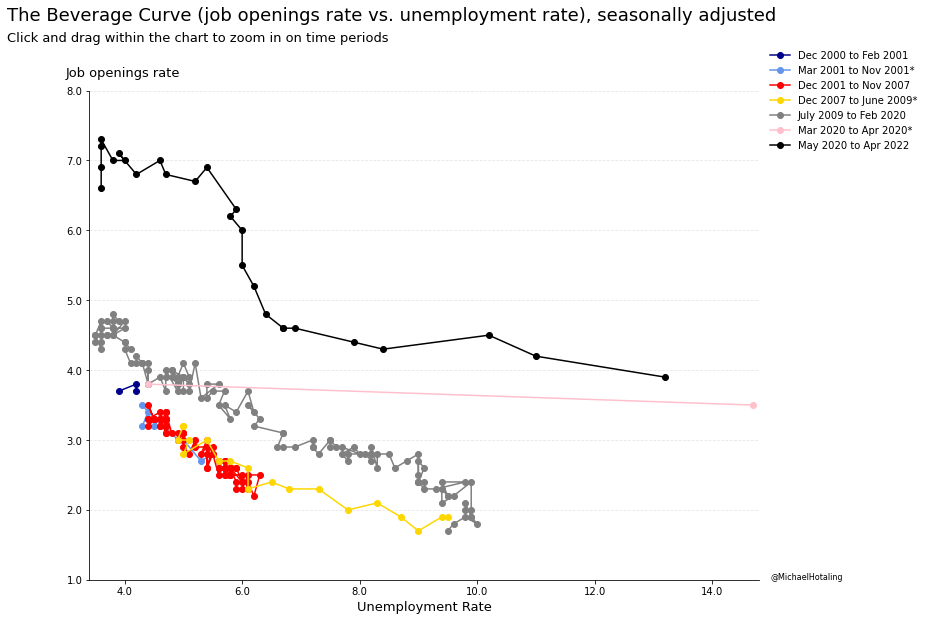

In [7]:
url = "https://www.bls.gov/charts/job-openings-and-labor-turnover/job-openings-unemployment-beveridge-curve.htm"

fig, ax = plt.subplots(figsize=(12,9))

(pd.read_html(url)[0]
 .rename(columns=lambda cols: cols.lower().replace(" ","_"))
 .assign(month = lambda x: pd.to_datetime(x['month']),
         job_openings_rate = lambda df: df['job_openings_rate'].str.replace("%","").astype(float),
         unemployment_rate = lambda df: df['unemployment_rate'].str.replace("%","").astype(float)
        )
 .pipe(categories)
 .pipe(plotter, ax)
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis = 'y', linestyle ="--", alpha = 0.3)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylim(1,8)
ax.set_xlim(3.4,14.8)
ax.set_xlabel("Unemployment Rate", size=13)
plt.text(3.0, 8.2, "Job openings rate",size=13)
plt.text(2.0, 9.0, "The Beverage Curve (job openings rate vs. unemployment rate), seasonally adjusted",size=18)
plt.text(2.0, 8.7, "Click and drag within the chart to zoom in on time periods",size=13)
plt.text(15, 1, "@MichaelHotaling",size=8)